In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data = pd.read_csv("titanic_dataset.csv")

Read top Rows from dataset of csv file

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data = pd.read_csv("titanic_dataset.csv", index_col="PassengerId")

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


** There are 11 distinct columns and 5 of them are object type, 4 of them are integer type and 2 of them are float type

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

** There are missing values in the data columns of Age,Cabin and Embarked.

In [8]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

** Dataset consist of Name of the Passenger, Sex, Age, Fare, those who survived  etc.

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Description of data from dataframe

In [10]:
gender = data["Sex"].value_counts()

In [11]:
gender

male      577
female    314
Name: Sex, dtype: int64

** Details of gender type males and females count

In [12]:
survived = data["Survived"].sum()

In [13]:
survived

342

** Count of how many persons survived.

In [14]:
sur =data[["Sex","Survived"]].groupby("Sex").sum()

In [15]:
sur

,Survived
Sex,
female,233
male,109


** Count of how many females and males survived.

# 4. Filling Null Values

**Cleaning of data set by finding null values and filling it with suitable method also deleting the irrelevant columns with ambiguous data and dropping the same.

In [16]:
data['Age'] =data['Age'].fillna(data["Age"].mean())
data["Age"]

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

** Filling the null values of Age Column with mean method.

In [17]:
for i in ["Embarked","Cabin"]:
    data[i]= data[i].fillna(data[i].mode()[0])

In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

** Filling the null values of Cabin Column with mode method.

In [19]:
data.drop('Ticket',axis=1,inplace=True)

** Dropping the column of TICKET No , since the dataframe is ambiguous

In [20]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

** After dropping column Ticket the total number of columns become 10.

# visualizing and understanding distribution of numerical data

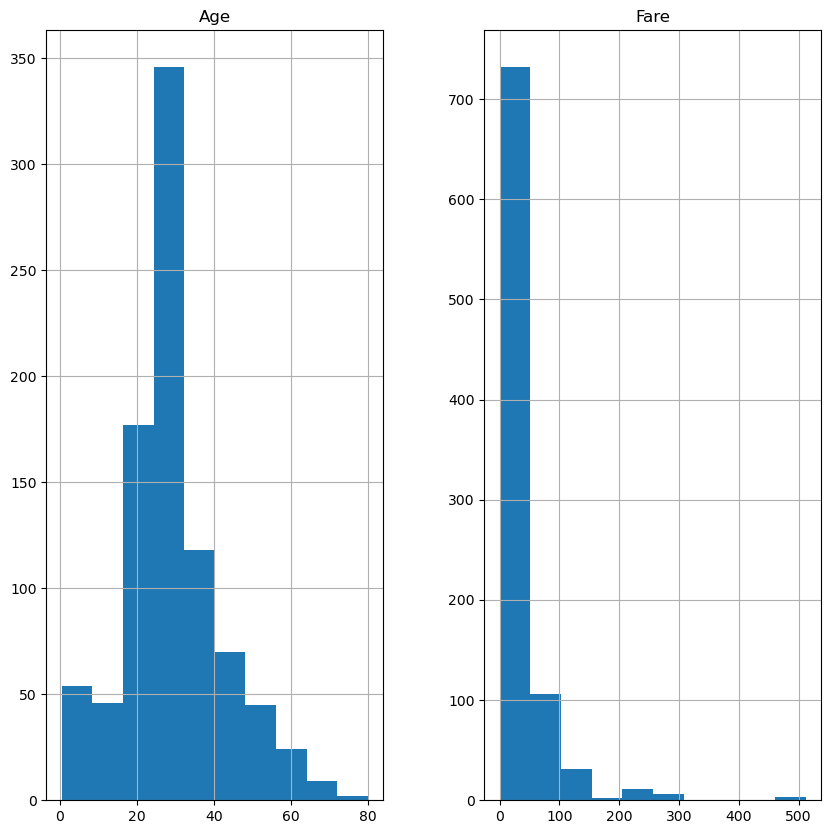

In [21]:
freqdata = data.select_dtypes(include="float64")
freqdata.hist(figsize =(10,10))
plt.show()

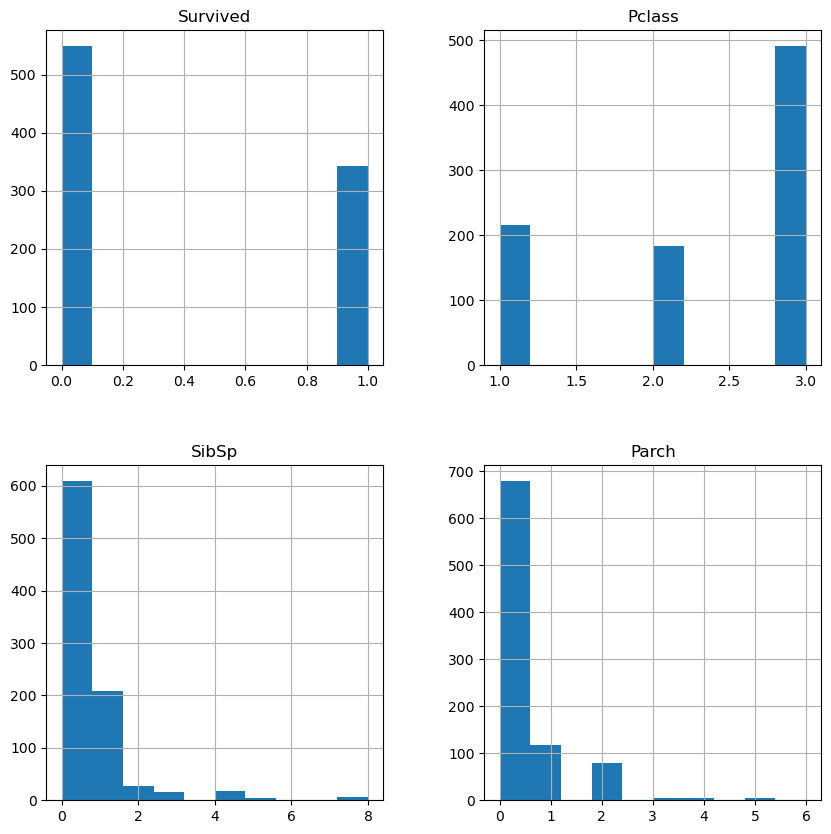

In [22]:
freqdata = data.select_dtypes(include="int")
freqdata.hist(figsize =(10,10))
plt.show()

# 5. Check and handle outliers in at least 3 columns in the dataset

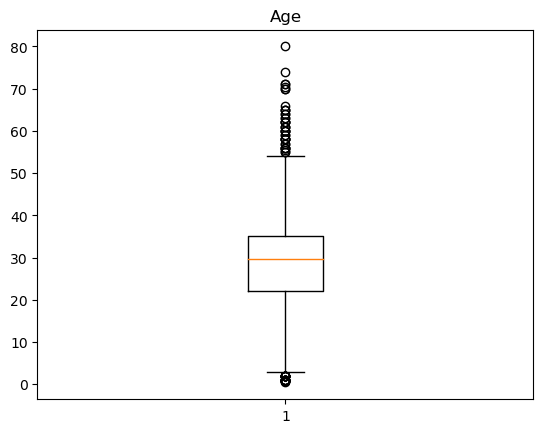

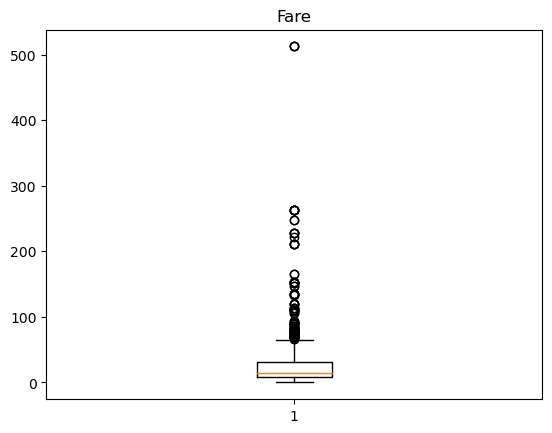

In [23]:
num_col = ['Age','Fare']
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

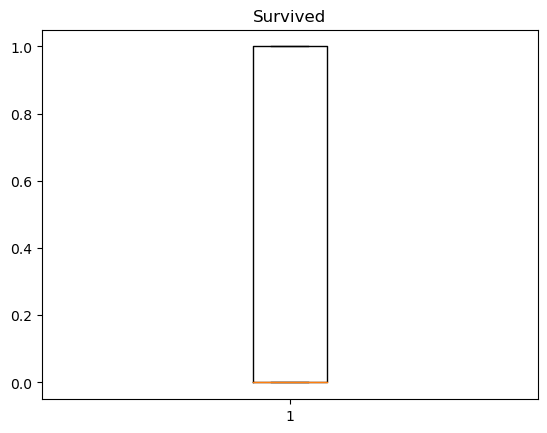

In [24]:
num_col = ["Survived"]
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

*** Finding IQR for data column "Fare"

In [25]:
q1 = np.percentile(data['Fare'] , 25,method="midpoint")
q1

7.9104

In [26]:
q2 = np.percentile(data['Fare'] ,50,method="midpoint")
q2

14.4542

In [27]:
q3 = np.percentile(data['Fare'] ,75,method="midpoint")
q3

31.0

In [28]:
iqr = q3 - q1

In [29]:
low_limit = q1 - 1.5*iqr

In [30]:
up_limit = q3 + 1.5*iqr

In [31]:
print(low_limit)
print(up_limit)

-26.724
65.6344


** From the above observation we can conclude that the data set of Fare and Age are diverse in values. Hence it is convinent to neglect the Outlier in this case. Also the data set Survived has no outliers.


# Encoding and Scaling

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le= LabelEncoder()

**Using label encoding for object type data and for further scaling procedure

In [34]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [36]:
data["Embarked"] = le.fit_transform(data["Embarked"])
data["Embarked"]

PassengerId
1      2
2      0
3      2
4      2
5      2
      ..
887    2
888    2
889    2
890    0
891    1
Name: Embarked, Length: 891, dtype: int32

In [37]:
data["Sex"] = le.fit_transform(data["Sex"])
data["Sex"]

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int32

In [38]:
data["Cabin"] = le.fit_transform(data["Cabin"])
data["Cabin"]

PassengerId
1      47
2      81
3      47
4      55
5      47
       ..
887    47
888    30
889    47
890    60
891    47
Name: Cabin, Length: 891, dtype: int32

In [39]:
data["Name"] = le.fit_transform(data["Name"])
data["Name"]

PassengerId
1      108
2      190
3      353
4      272
5       15
      ... 
887    548
888    303
889    413
890     81
891    220
Name: Name, Length: 891, dtype: int32

In [40]:
data = pd.get_dummies(data)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,108,1,22.000000,1,0,7.2500,47,2
2,1,1,190,0,38.000000,1,0,71.2833,81,0
3,1,3,353,0,26.000000,0,0,7.9250,47,2
4,1,1,272,0,35.000000,1,0,53.1000,55,2
5,0,3,15,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,548,1,27.000000,0,0,13.0000,47,2
888,1,1,303,0,19.000000,0,0,30.0000,30,2
889,0,3,413,0,29.699118,1,2,23.4500,47,2


** from above all the object type data columns has been coded to numerical value for further scaling procedure.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [42]:
data[["Scalarsurvived"]] = scaler.fit_transform(data[["Survived"]])
data[["Survived","Scalarsurvived"]]

,Survived,Scalarsurvived
PassengerId,,
1,0,0.0
2,1,1.0
3,1,1.0
4,1,1.0
5,0,0.0
...,...,...
887,0,0.0
888,1,1.0
889,0,0.0


** From above the target "Survived" already takes values 0 and 1 and there is no significant change after scaling,no further need for Scaling is required.

In [43]:
from sklearn import preprocessing

In [44]:
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

Description of all features in data columns after scaling.

In [45]:
data["Scalarsurvived"] = le.fit_transform(data["Scalarsurvived"])
y = minmax.fit_transform(data)
y= pd.DataFrame(y)
y.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.500000,0.647587,0.367921,0.065376,0.063599,0.062858,0.367395,0.768238,0.383838
std,0.486592,0.418036,0.289162,0.477990,0.163383,0.137843,0.134343,0.096995,0.161427,0.395752,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.250000,0.000000,0.271174,0.000000,0.000000,0.015440,0.321918,0.500000,0.000000
50%,0.000000,1.000000,0.500000,1.000000,0.367921,0.000000,0.000000,0.028213,0.321918,1.000000,0.000000
75%,1.000000,1.000000,0.750000,1.000000,0.434531,0.125000,0.000000,0.060508,0.321918,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
